# CDC_Capstone:  Part II - Feature Engineering

### This is a classification , categorical response problem used to determine the probability of YES or NO probability of diabetes based select features


Purpose of Part II:
1- Address Outliers 
2- Replace codes with label for better interprepation of data
3- Create datasets needed for the dashboard notebook

In [1]:

#### Run imports:
# standard data science imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 
# Statistics imports
from scipy import stats
#import statsmodels.api as sm

import csv
#import import_ipynb
import pandas as pd

 

In [2]:
#save functions and data source
#%run my_functions.ipynb
from prepare import PrepareData
#Testing - Read local data
prepared_data = PrepareData(download_new=False)

 
# Reading from my local directory  is much faster
Class : Create a class and method to do the following

1. take a list of names. For example: ['menhealth','menhealth','physical','dietary,heart','sex,edu','all']
2. each name will call another function to read the local directory and retrieve the CSV adn return it as a df
note the directory name is defined in the run function found in my_functions file
3.  The data frame key will be the name.  Key, data will be the dataframe
4. The dictiionary of dataframes will be returned.  

In [3]:
#read in all the data from your local directory.
data = prepared_data.run()
 

In [4]:
df = data['all']

# 1. Addressing the Issue:  Outliers

I will use quartiles to address outliers identified in Getting To Know the Data - Part I.  
Pros: Data maybe anonmies and not true outliers.  I maybe deleting important data for my analysis
Cons:  I will increase my logistic model performance

## review boxplot and statistics


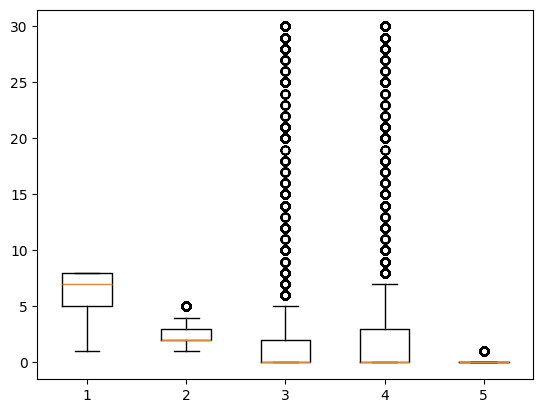

In [5]:
#box plot columns in the data to show large variances in data
plt.boxplot(df[['Income','GenHlth','MentHlth','PhysHlth','DiffWalk']]);

## IQR Method to remove outliers

## MentHlth - remove outliers

In [6]:
df[['Income','GenHlth','MentHlth','PhysHlth','DiffWalk']].describe()

,Income,GenHlth,MentHlth,PhysHlth,DiffWalk
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,6.053875,2.511392,3.184772,4.242081,0.168224
std,2.071148,1.068477,7.412847,8.717951,0.374066
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,5.000000,2.000000,0.000000,0.000000,0.000000
50%,7.000000,2.000000,0.000000,0.000000,0.000000
75%,8.000000,3.000000,2.000000,3.000000,0.000000
max,8.000000,5.000000,30.000000,30.000000,1.000000


MentHlth, 75% of the populatation is less than or equal to 2.0.  PhysHlth, 75% of the population is less than or equal to 3.0

In [7]:
# IQR_MentHlth

min_IQR = df['MentHlth'].min()
Q1 = df.MentHlth.quantile(0.25)
Q3 = df.MentHlth.quantile(0.75)
Q1, Q3

(0.0, 2.0)

In [8]:
IQR = Q3 - Q1
IQR

2.0

#### Find upper and lower limit

In [9]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-3.0, 5.0)

In [10]:
df.shape

(253680, 23)

In [11]:
# Identified outliers for Menlth Health Data
df[(df['MentHlth'] < lower_limit) | (df['MentHlth'] > upper_limit)]

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,1,40,1,0,0,0,...,1,0,5,18,15,1,0,9,4,3
2,2,0,1,1,1,28,0,0,0,0,...,1,1,5,30,30,1,0,9,4,8
8,8,1,1,1,1,30,1,0,1,0,...,1,0,5,30,30,1,0,9,5,1
14,14,0,0,1,1,33,1,1,0,1,...,1,1,4,30,28,0,0,4,6,2
18,18,0,0,0,0,23,0,0,0,0,...,1,0,2,15,0,0,0,2,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253648,253648,0,0,0,1,28,0,0,0,0,...,1,1,3,6,14,0,1,5,5,1
253649,253649,0,0,1,1,27,0,0,0,0,...,1,0,2,30,5,0,0,4,6,5
253665,253665,0,0,1,1,17,0,0,0,0,...,1,1,4,30,30,0,0,5,4,1
253670,253670,1,1,1,1,25,0,0,1,0,...,1,0,5,15,0,1,0,13,6,4


In [12]:
result = (36208/253680)* 100
result

14.273099968464207

In [13]:
print(f'I identied {result:.0f}% percente of the records are outliers using IQP the lower & upper bounds in the MentHlth data')

I identied 14% percente of the records are outliers using IQP the lower & upper bounds in the MentHlth data


In [14]:
### Remove the outliers from the original dataframe
df_result = df[(df['MentHlth'] >= lower_limit) & (df['MentHlth'] <= upper_limit)]
  

In [15]:
df_result.shape

(217472, 23)

In [16]:
df = df_result

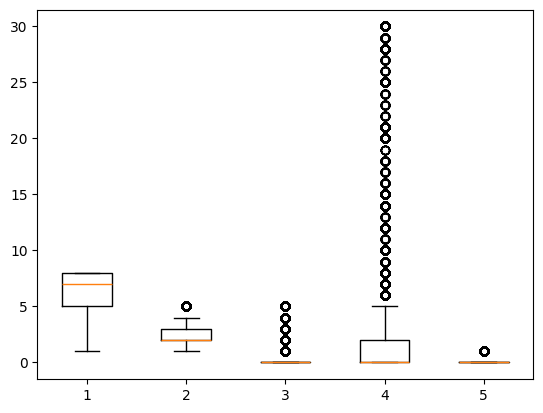

In [17]:
#box plot columns in the data to show large variances in data
plt.boxplot(df[['Income','GenHlth','MentHlth','PhysHlth','DiffWalk']]);

## PhysHlth - remove outliers

In [18]:
df[['Income','GenHlth','MentHlth','PhysHlth','DiffWalk']].describe()

,Income,GenHlth,MentHlth,PhysHlth,DiffWalk
count,217472.000000,217472.000000,217472.000000,217472.000000,217472.000000
mean,6.219458,2.389581,0.538437,3.115040,0.135622
std,1.973255,1.002121,1.269547,7.424339,0.342388
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,5.000000,2.000000,0.000000,0.000000,0.000000
50%,7.000000,2.000000,0.000000,0.000000,0.000000
75%,8.000000,3.000000,0.000000,2.000000,0.000000
max,8.000000,5.000000,5.000000,30.000000,1.000000


MentHlth, 75% of the populatation is less than or equal to 2.0.  PhysHlth, 75% of the population is less than or equal to 3.0

In [19]:
# IQR_PhysHlth

min_IQR = df['PhysHlth'].min()
Q1 = df.MentHlth.quantile(0.25)
Q3 = df.MentHlth.quantile(0.75)
Q1, Q3

(0.0, 0.0)

In [20]:
IQR = Q3 - Q1
IQR

0.0

#### Find upper and lower limit

In [21]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(0.0, 0.0)

In [22]:
df.shape

(217472, 23)

In [23]:
# Identified outliers for Menlth Health Data
df[(df['PhysHlth'] < lower_limit) | (df['PhysHlth'] > upper_limit)]

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
5,5,0,1,1,1,25,1,0,0,1,...,1,0,2,0,2,0,1,10,6,8
6,6,0,1,0,1,30,1,0,0,0,...,1,0,3,0,14,0,0,9,6,7
11,11,0,1,1,1,34,1,0,0,0,...,1,0,3,0,30,1,0,10,5,1
12,12,0,0,0,1,26,1,0,0,0,...,1,0,3,0,15,0,0,7,5,7
22,22,0,0,0,1,28,1,0,0,0,...,1,0,3,0,7,0,1,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253663,253663,0,0,0,1,23,0,0,0,0,...,1,1,2,0,30,0,0,5,6,2
253666,253666,0,1,0,1,23,0,0,0,0,...,1,0,3,0,15,0,0,6,5,2
253669,253669,0,0,1,1,27,0,0,0,0,...,1,1,1,0,3,0,1,6,2,4
253671,253671,0,1,1,1,23,0,1,1,0,...,1,1,4,0,5,0,1,8,3,2


In [24]:
result = (41792/217472)* 100
result

19.217186580341377

In [25]:
print(f'I identied {result:.0f}% percente of the records are outliers using IQP the lower & upper bounds in the PhysHlth data')

I identied 19% percente of the records are outliers using IQP the lower & upper bounds in the PhysHlth data


In [26]:
### Remove the outliers from the original dataframe
df_result = df[(df['MentHlth'] >= lower_limit) & (df['MentHlth'] <= upper_limit)]
  

In [27]:
df_result.shape

(175680, 23)

In [28]:
df = df_result

# Reviewed boxplot

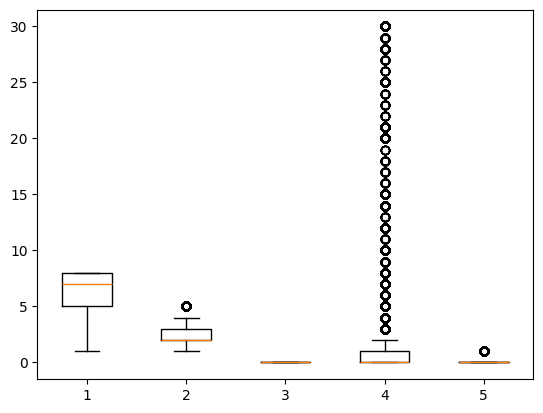

In [29]:
#box plot columns in the data to show large variances in data
plt.boxplot(df[['Income','GenHlth','MentHlth','PhysHlth','DiffWalk']]);

## Added columns with codes values for easier interpretation of the data  

### Before column update

In [30]:
df.columns

Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')

In [31]:
#created method to update all my column name
df = prepared_data.update_labels(df)

### After column update

In [32]:
df.columns

Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Gender', 'Type', 'GeneralHealth', 'income',
       'education'],
      dtype='object')

### Export Data for dashboard¶

In [33]:
df.columns

Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Gender', 'Type', 'GeneralHealth', 'income',
       'education'],
      dtype='object')

## Filter for fewer rows and  columns: 

In [48]:
fewer_columns = ['Diabetes_binary','Gender', 'Types','MentHlth', 'GeneralHealth', 'Type',
       'income', 'education','Sex','PhysHlth','HeartDiseaseorAttack']

In [70]:
#write update file to drive
data_dic = {}

In [71]:
#create a subset of data
data_dic['genhealth'] = df[['Diabetes_binary','Type','GeneralHealth', 'Gender' ]]

In [72]:
data_dic['dietary'] = df[['Diabetes_binary', 'Fruits','Veggies','Gender','Type']]  

In [73]:
data_dic['heart'] = df[['Diabetes_binary','HeartDiseaseorAttack' , 'Gender','Type' ]]

In [74]:
data_dic['sex'] = df[['Diabetes_binary', 'Gender']]

In [75]:
data_dic['edu'] = df[['Diabetes_binary', 'education','Type']]

In [76]:
data_dic['all'] =df[['Diabetes_binary','Gender',	'GeneralHealth','GenHlth',	'Type',	'income','Income',	'education','Education']]

In [77]:
#Write file to local directory
prepared_data.write_data(data_dic, 'data/prepared',index=True )

### Testing my class
Lastly, create prepare.py file and add all my functions
Better to view py file in pycharm so you done mess up the formatting incase you have to make changes


In [68]:
from prepare import PrepareData

### Testing reading local data

In [69]:
#Testing - Read local data
prepare_data = PrepareData(download_new=False)

In [70]:
#will return these dataframe already cleaned and transformed
# 'menhealth','menhealth','physical','dietary','heart','sex','edu','all' 
data = prepare_data.run()


In [71]:
data['menhealth'].head()

,Diabetes_binary,Type,MentHlth,Gender
0,0,nondiabetic,14,men
1,0,nondiabetic,0,men
2,0,nondiabetic,0,men
3,0,nondiabetic,0,women
4,1,diabetic,0,women


In [72]:
data['all'].head()

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,Sex,Age,Education,Income,Gender,Types,GeneralHealth,Type,income,education
0,215265,0,0,1,0,30,1,0,0,1,...,0,3,4,1,men,nondiabetic,Good,nondiabetic,<10K,12orGED
1,141614,0,0,0,1,35,1,0,0,1,...,1,7,4,1,women,nondiabetic,Excellent,nondiabetic,<10K,12orGED
2,28979,0,0,0,1,25,0,0,0,1,...,0,10,2,1,men,nondiabetic,Very good,nondiabetic,<10K,1-8
3,123066,1,0,1,1,45,0,0,0,0,...,0,4,3,1,men,diabetics,Fair,diabetic,<10K,9-11
4,36247,0,0,0,1,28,0,0,0,1,...,1,13,6,1,women,nondiabetic,Good,nondiabetic,<10K,C4+


In [73]:
 data['all'].shape

(253680, 29)